<a href="https://colab.research.google.com/github/Argento27/Data_Science_Introduction_With_Python/blob/master/BigDataRamirez_Guevara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import plotly.graph_objects as go
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
ruta = "/content/drive/MyDrive/UPSO/BIGDATA/ventas"

In [46]:
archivos = os.listdir(ruta)
archivos

['Dataset_de_ventas_Abril.csv',
 'Dataset_de_ventas_Agosto.csv',
 'Dataset_de_ventas_Diciembre.csv',
 'Dataset_de_ventas_Enero.csv',
 'Dataset_de_ventas_Febrero.csv',
 'Dataset_de_ventas_Julio.csv',
 'Dataset_de_ventas_Junio.csv',
 'Dataset_de_ventas_Marzo.csv',
 'Dataset_de_ventas_Mayo.csv',
 'Dataset_de_ventas_Noviembre.csv',
 'Dataset_de_ventas_Octubre.csv',
 'Dataset_de_ventas_Septiembre.csv']

In [50]:
# Creamos un diccionario para guardar archivos.
dataframes = {}

for archivo in archivos:
  if archivo.endswith('csv'):
    mes = archivo.split('_')[3].split('.')[0] # obtener el nombre del mes solo
    #obtenemos ruta completa de donde se encuentra el csv mes a mes
    path_completo = os.path.join(ruta, archivo) # obtener ruta de acceso completa
    df = pd.read_csv(path_completo)   #cargo el archivo csv en un df
    #copia del df original
    df_ventas = df.copy()

    # LIMPIO CADA DF ANTES DE CARGARLO
    df_ventas['Cantidad Pedida'] = pd.to_numeric(df_ventas['Cantidad Pedida'], errors = 'coerce') #errors = coerce transfora lo
    df_ventas['Precio Unitario'] = pd.to_numeric(df_ventas['Precio Unitario'], errors = 'coerce')
    #esta es una mascara que me genera un true si hay un nan, y sino hay nan me pone un false
    df_ventas = df_ventas.loc[~df_ventas['Cantidad Pedida'].isna()]
    df_ventas = df_ventas.loc[~df_ventas['Precio Unitario'].isna()]
    #aca elimino los nan's
    df_ventas = df_ventas.dropna()
    #aca voy a pasar todos los datos al tipo numerico q corresponda
    df_ventas['Cantidad Pedida'] = df_ventas['Cantidad Pedida'].astype(int) #esta funcion me transforma todos los valores a numericos a int
    df_ventas['Precio Unitario'] = df_ventas['Precio Unitario'].astype(float) #esta funcion me transforma todos los valores a numericos a float

    #cada mes le cargo su dataset correspondiente, por eso uso la variable mes
    dataframes[mes] = df_ventas

dataframes['Enero']



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [51]:
# Obtengo los datos de dia y hora de los pedidos

def extraer_datos(datos):
  df_ventas['Fecha de Pedido'] = pd.to_datetime(df_ventas['Fecha de Pedido'])
  datos['Hora'] = df_ventas['Fecha de Pedido'].dt.hour
  datos['Dia'] = df_ventas['Fecha de Pedido'].dt.day

dataframe_mes = extraer_datos(df_ventas)

In [52]:
# Ordenar los meses
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

totales_ventas = []
nombres_meses = []

for mes in meses:
  dataframe_mes = dataframes[mes]
  dataframes_mes = extraer_datos(dataframe_mes)

  #total de ventas de cada mes
  total_ventas_mes = dataframe_mes['Cantidad Pedida'].sum() # total de ventas de cada df(x mes)
  totales_ventas.append(total_ventas_mes)                   #append al array de la suma de total de ventas x cada mes(creo un array con las ventas de cada mes)
  #agregamos el nombre de cada mes, al array que contiene el nombre de todos los meses
  nombres_meses.append(mes)



In [53]:
# Graficamos usando Plotly
import plotly.graph_objects as go

# Configuro el grafico

fig = go.Figure()

fig.add_trace(go.Bar(
    x=nombres_meses,
    y=totales_ventas,
    yaxis="y",
    name="Unidades vendidas",
    marker =dict(color=totales_ventas,colorscale= 'RdYlGn', colorbar= dict(title= "Total de ventas")),
    text = totales_ventas,
    textposition = 'auto'

))

fig.update_layout(
    title="Unidades vendidas por mes",
    xaxis=dict(title="Meses"),
    yaxis=dict(title="Unidades Vendidas", side = "left")
)

fig.show()

In [54]:
#Inciso 2
# Creo el objeto figura
Horas = list(range(24))
fig = go.Figure()

for mes in meses:
  dataframe_mes = dataframes[mes]
  dataframes_mes = extraer_datos(dataframe_mes)

  Ventas_por_hora= dataframe_mes.groupby('Hora')['Cantidad Pedida'].count()

# Agrego al objeto figura un grafico de de linea con las horas y las ventas por hora
  fig.add_trace(go.Scatter(
      x=Horas,
      y=Ventas_por_hora,
      mode='lines',
      name=mes,
      line=dict(shape='spline', smoothing=1.3, width=3)))

# Configuro los ejes y los títulos
fig.update_layout(

    title="Unidades vendidas por hora",
    xaxis=dict(title="Hora", tickvals=Horas),  # Para que en el eje x se muestren todos los valores uso tickvals=Horas
    yaxis=dict(title="Unidades vendidas", side="left"))

fig.show()

In [55]:
fig = go.Figure()
horas_analizadas = [12,19,14]

for hora in horas_analizadas:
  total_productos_vendidos = []

  for mes in meses:
    dataframe_mes = dataframes[mes]
    dataframes_mes = extraer_datos(dataframe_mes)
    ventas_hora = dataframe_mes[dataframe_mes['Hora'] == hora]
    total_productos_vendidos.append(ventas_hora['Cantidad Pedida'].sum())

  fig.add_trace(go.Scatter(

      x=meses,
      y=total_productos_vendidos,
      mode='lines',
      name=f'{hora} horas',
      line = dict(width= 2, shape= 'spline')
  ))

# Configuro los ejes y los títulos
fig.update_layout(

  title="Unidades vendidas por hora",
  xaxis=dict(title="Hora", tickvals=Horas),  # Para que en el eje x se muestren todos los valores uso tickvals=Horas
  yaxis=dict(title="Unidades vendidas", side="left"),
  legend=dict(y=0.3, yanchor='bottom')
)

fig.show()

In [56]:
#Inciso 3 - Array de meses para recorrer el df
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

#Creo las dos listas vacias que seran los ejes del grafico
cantidad_pedidos = []
nombres_meses = []

# para cada mes
for mes in meses:
    #Extraigo los datos del mes
    dataframe_mes = dataframes[mes]

    # Creamos la columna "Ciudad", filtrando la direccion de envio (split("-")(2).split(" ").(0))
    dataframe_mes['Ciudad'] = dataframe_mes['Dirección de Envio'].str.extract(r',\s(.*?),\s')

    # Una vez extraidos los estados, se suman las cantidades pedidas, agrupadas
    # por estado
    ciudad_mas_pedidos = dataframe_mes.groupby('Ciudad')['Cantidad Pedida'].sum()

    # Saco el top 1 (valor maximo)
    Ciudad_maximo_ventas = ciudad_mas_pedidos.idxmax() #Etiqueta del maximo valor
    cantidad_maxima_ventas = ciudad_mas_pedidos.max()

    # Lo agrago a las listas para gráficar
    nombres_meses.append(f"{mes}-{Ciudad_maximo_ventas}")
    cantidad_pedidos.append(cantidad_maxima_ventas)

print (ciudad_mas_pedidos)


Ciudad
Atlanta          2224
Austin           1520
Boston           3029
Dallas           2300
Los Angeles      4373
New York City    3828
Portland         1859
San Francisco    6786
Seattle          2202
Name: Cantidad Pedida, dtype: int64


In [58]:
import plotly.express as px
import pandas as pd

# Crear un DataFrame con los nombres de los meses, las ciudades y la cantidad de pedidos
df = pd.DataFrame({'Mes': nombres_meses, 'Ciudad': [nombre.split('-')[1] for nombre in nombres_meses], 'Cantidad de Pedidos': cantidad_pedidos})

# Utilizar Plotly Express para crear un gráfico de barras
fig = px.bar(df, x='Ciudad', y='Cantidad de Pedidos', color='Mes', title='Ciudades con las Mayores Ventas por Mes')

# Personalizar el gráfico
fig.update_xaxes(title_text='Ciudad')
fig.update_yaxes(title_text='Cantidad de Pedidos')

# Mostrar el gráfico
fig.show()


In [23]:
#Cómo se comparan las ventas en diferentes estados o regiones?
#Creo el array de meses para recorrer el df
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

#Creo las dos listas vacias que seran los ejes del grafico
cantidad_pedidos = []
nombres_meses = []

# mes a mes
for mes in meses:
    #Extraigo los datos del mes
    dataframe_mes = dataframes[mes]

    # Creamos la columna "Estado", filtrando la direccion de envio (split("-")(2).split(" ").(0))
    dataframe_mes['Estado'] = dataframe_mes['Dirección de Envio'].str.extract(r'(\b[A-Z]{2}\b)')

    # Una vez extraidos los estados, se suman las cantidades pedidas, agrupadas
    # por estado
    estado_mas_pedidos = dataframe_mes.groupby('Estado')['Cantidad Pedida'].sum()

    # Saco el top 1 (valor maximo)
    estado_maximo_ventas = estado_mas_pedidos.idxmax() #Etiqueta del maximo valor
    cantidad_maxima_ventas = estado_mas_pedidos.max()

    # Lo agrago a las listas para graficar
    nombres_meses.append(f"{mes}-{estado_maximo_ventas}")
    cantidad_pedidos.append(cantidad_maxima_ventas)

    print(mes)
    print(estado_mas_pedidos)

Enero
Estado
CA    4364
GA     877
MA    1171
ME     138
NY    1497
OR     553
TX    1459
WA     809
Name: Cantidad Pedida, dtype: int64
Febrero
Estado
CA    5412
GA    1042
MA    1401
ME     208
NY    1807
OR     730
TX    1795
WA    1066
Name: Cantidad Pedida, dtype: int64
Marzo
Estado
CA    6773
GA    1385
MA    1884
ME     214
NY    2215
OR     901
TX    2301
WA    1333
Name: Cantidad Pedida, dtype: int64
Abril
Estado
CA    8386
GA    1633
MA    2190
ME     265
NY    2741
OR    1134
TX    2611
WA    1608
Name: Cantidad Pedida, dtype: int64
Mayo
Estado
CA    7321
GA    1506
MA    1985
ME     241
NY    2556
OR    1067
TX    2577
WA    1404
Name: Cantidad Pedida, dtype: int64
Junio
Estado
CA    6138
GA    1226
MA    1616
ME     231
NY    2001
OR     850
TX    1995
WA    1198
Name: Cantidad Pedida, dtype: int64
Julio
Estado
CA    6498
GA    1259
MA    1771
ME     219
NY    2169
OR     808
TX    2080
WA    1265
Name: Cantidad Pedida, dtype: int64
Agosto
Estado
CA    5264
GA    1053
MA  

In [24]:
#Grafico

custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig = go.Figure()

fig.add_trace(go.Bar(
    x=nombres_meses,
    y=cantidad_pedidos,
    yaxis="y",
    name="Unidades vendidas",
    marker=dict(color=custom_colors),
    text=cantidad_pedidos,
    textposition='auto'
))

fig.update_layout(
    title="Unidades vendidas por mes en cada Estado",
    xaxis=dict(title="Estados"),
    yaxis=dict(title="Unidades vendidas", side="left")
)

fig.show()

In [25]:
#4
# Creo el array de meses para recorrer el DataFrame
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Creo la lista para almacenar los productos más vendidos de cada mes
productos_mes_a_mes = []


# Para cada mes
for mes in meses:
    # Extraigo los datos del mes
    dataframe_mes = dataframes[mes]

    # Sumo los productos y la cantidad pedida para obtener el total de productos vendidos
    productos_vendidos = dataframe_mes.groupby('Producto')['Cantidad Pedida'].sum()

    # Obtengo el producto más vendido del mes
    producto_mas_vendido = productos_vendidos.idxmax()  # Etiqueta del producto más vendido
    cantidad_maxima_ventas = productos_vendidos.max()

    # Agrego los resultados a la lista
    productos_mes_a_mes.append([mes, producto_mas_vendido, cantidad_maxima_ventas])

# Imprimir los resultados
for mes, producto, cantidad in productos_mes_a_mes:
    print(f"Mes: {mes}, Producto más vendido: {producto}, Cantidad: {cantidad}")

Mes: Enero, Producto más vendido: AAA Batteries (4-pack), Cantidad: 1596
Mes: Febrero, Producto más vendido: AAA Batteries (4-pack), Cantidad: 1975
Mes: Marzo, Producto más vendido: AAA Batteries (4-pack), Cantidad: 2478
Mes: Abril, Producto más vendido: AAA Batteries (4-pack), Cantidad: 2936
Mes: Mayo, Producto más vendido: AAA Batteries (4-pack), Cantidad: 2931
Mes: Junio, Producto más vendido: AAA Batteries (4-pack), Cantidad: 2160
Mes: Julio, Producto más vendido: AAA Batteries (4-pack), Cantidad: 2366
Mes: Agosto, Producto más vendido: AAA Batteries (4-pack), Cantidad: 2019
Mes: Septiembre, Producto más vendido: AAA Batteries (4-pack), Cantidad: 1927
Mes: Octubre, Producto más vendido: AAA Batteries (4-pack), Cantidad: 3362
Mes: Noviembre, Producto más vendido: AAA Batteries (4-pack), Cantidad: 3027
Mes: Diciembre, Producto más vendido: AAA Batteries (4-pack), Cantidad: 4240


In [26]:
# Crear un DataFrame a partir de la lista productos_mes_a_mes
df_productos_mes = pd.DataFrame(productos_mes_a_mes, columns=['Mes', 'Producto', 'Cantidad'])

fig = px.bar(df_productos_mes, x='Mes', y='Cantidad', text='Producto',
             title='Producto más vendido por mes',
             color='Mes',
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_traces(textposition='outside')
fig.update_xaxes(categoryorder='total ascending')
fig.update_layout(xaxis_title='Mes', yaxis_title='Cantidad Vendida')
fig.update_layout(
    autosize=False,
    width=1400,
    height=600,
)
fig.show()

In [27]:
#5
ventas_por_dia_mes_total = pd.DataFrame()

for mes in meses:


    dataframe_mes = dataframes[mes]

    # Convierto la columna 'Fecha de Pedido' a tipo datetime
    dataframe_mes['Fecha de Pedido'] = pd.to_datetime(dataframe_mes['Fecha de Pedido'])

    # Agrego las columnas 'Dia' y 'Mes'
    dataframe_mes['Dia'] = dataframe_mes['Fecha de Pedido'].dt.day
    dataframe_mes['Mes'] = dataframe_mes['Fecha de Pedido'].dt.month

    # Agrupo y sumo las ventas por día y mes
    ventas_por_dia_mes = dataframe_mes.groupby(['Dia', 'Mes'])['Cantidad Pedida'].sum().reset_index()

    # Agrego los resultados al DataFrame total
    ventas_por_dia_mes_total = pd.concat([ventas_por_dia_mes_total, ventas_por_dia_mes])


print(ventas_por_dia_mes_total)



    Dia  Mes  Cantidad Pedida
0     1    1              343
1     1    2                6
2     2    1              368
3     3    1              330
4     4    1              330
..  ...  ...              ...
27   27   12              869
28   28   12              931
29   29   12              954
30   30   12              928
31   31   12              886

[377 rows x 3 columns]


In [28]:
fig = px.scatter_3d(ventas_por_dia_mes_total, x='Dia', y='Mes', z='Cantidad Pedida',
                    color='Cantidad Pedida',
                    labels={'Cantidad Pedida': 'Cantidad Vendida'},
                    title='Relación entre Días, Meses y Cantidad Vendida')

fig.update_layout(scene=dict(xaxis_title='Día del Mes', yaxis_title='Mes', zaxis_title='Cantidad Vendida'))
fig.update_traces(marker=dict(size=3, opacity=1))

fig.show()


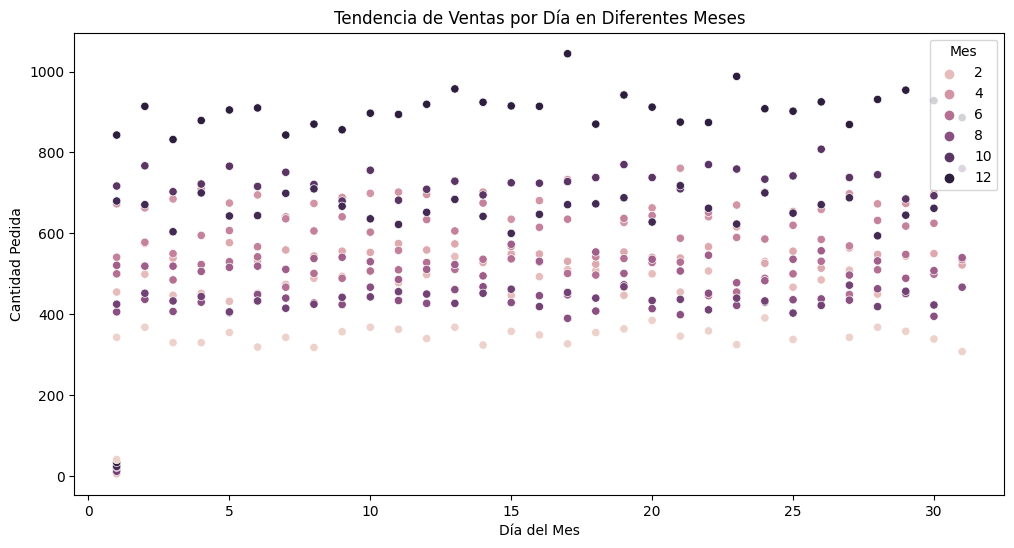

In [29]:
#¿Existe alguna tendencia o patrón en las ventas que se repita a lo largo de los días en los diferentes meses?

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.scatterplot(x='Dia', y='Cantidad Pedida', hue='Mes', data=ventas_por_dia_mes_total)
plt.title('Tendencia de Ventas por Día en Diferentes Meses')
plt.xlabel('Día del Mes')
plt.ylabel('Cantidad Pedida')
plt.legend(title='Mes', loc='upper right')
plt.show()

In [30]:
# Crear un DataFrame para analizar la variación de ventas por día de la semana
ventas_por_dia_semana = ventas_por_dia_mes_total.copy()

# Crear una columna que indique el día de la semana
ventas_por_dia_semana['Dia de la Semana'] = dataframe_mes['Fecha de Pedido'].dt.day_name()

# Calcular la suma de ventas por día de la semana
ventas_por_dia_semana = ventas_por_dia_semana.groupby('Dia de la Semana')['Cantidad Pedida'].sum().reset_index()

# Ordenar los días de la semana de manera personalizada
orden_dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_por_dia_semana['Dia de la Semana'] = pd.Categorical(ventas_por_dia_semana['Dia de la Semana'], categories=orden_dias_semana, ordered=True)

# Renombrar columnas
ventas_por_dia_semana = ventas_por_dia_semana.rename(columns={'Dia de la Semana': 'Día de la Semana', 'Cantidad Pedida': 'Ventas'})

# Mostrar el DataFrame resultante
print(ventas_por_dia_semana)


  Día de la Semana  Ventas
0           Friday   27779
1           Monday   30385
2         Saturday   19916
3           Sunday   34662
4         Thursday    6962
5          Tuesday   27364
6        Wednesday   62011


In [31]:
fig = px.pie(ventas_por_dia_semana,
             names='Día de la Semana',
             values='Ventas',
             title='Distribución de Ventas por Día de la Semana')

fig.show()

In [32]:
# Crear una columna que indique si el día es laborable o fin de semana
ventas_por_dia_semana['Tipo de Día'] = ventas_por_dia_semana['Día de la Semana'].apply(
    lambda x: 'Laborable' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Fin de Semana')

# Calcular el promedio de ventas para días laborables y fines de semana
ventas_promedio = ventas_por_dia_semana.groupby('Tipo de Día')['Ventas'].mean().reset_index()

# Mostrar el promedio de ventas
print(ventas_promedio)


     Tipo de Día   Ventas
0  Fin de Semana  27289.0
1      Laborable  30900.2


<Axes: xlabel='Ventas', ylabel='Tipo de Día'>

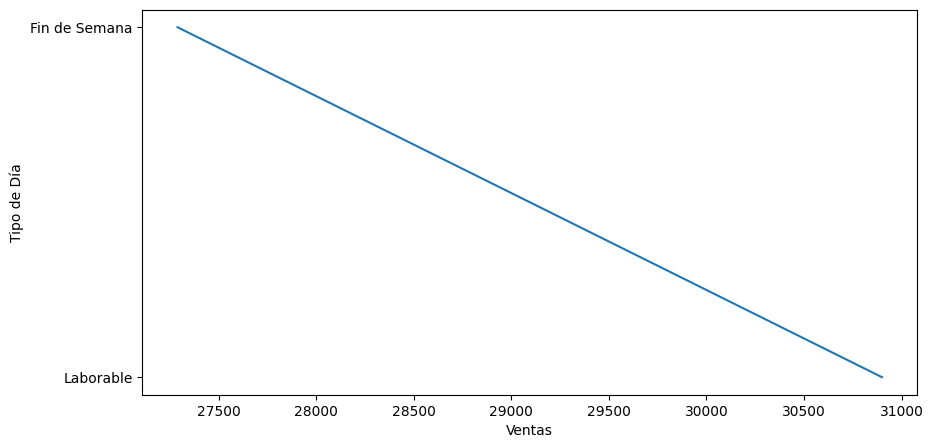

In [65]:
plt.subplots(figsize=(10, 5))
sns.lineplot(x="Ventas", y="Tipo de Día", data=ventas_promedio)